# Exploratory Data Analysis on Volve and VM Fields

## Import Alana

In [2]:
import credentials as cr
import alanapy
alana_token = cr.alana_token_open
root_url = "https://apps.alana.tech/open"
myapi = alanapy.Datasource(alana_token, root_url)

!python3 -m pip install --upgrade alanapy

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Well information

In [4]:
all_wells = myapi.getWells()
alanapy

In [5]:
all_wells.df

,id,well_name,spud_date,production_date,api_code,latitude,longitude,utm_x,utm_y,comment,type,field_fk,formation_fk,field_name,formation_name
0,7,9-F-5,None,2007-09-01,None,None,None,435050.02,6478563.52,None,None,1,1,VOLVE,HUGIN
1,6,9-F-4,None,2007-09-01,None,None,None,435050.02,6478563.52,None,None,1,1,VOLVE,HUGIN
2,5,9-F-15_D,None,2014-01-12,None,None,None,435050.02,6478563.53,None,None,1,1,VOLVE,HUGIN
3,4,9-F-14,None,2008-02-12,None,None,None,435050.02,6478563.52,None,None,1,1,VOLVE,HUGIN
4,3,9-F-12,None,2008-02-12,None,None,None,435050.17,6478574.70,None,None,1,1,VOLVE,HUGIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,863,YPF.Nq.LCm.e-2,None,None,None,-38.34727483,-68.60262977,NaN,NaN,,EXPLORATION,26,27,LOMA CAMPANA,SBLA
843,862,YPF.Nq.LCm.a-3,None,None,None,-38.36005552,-68.63345312,NaN,NaN,,PRODUCTION,26,28,LOMA CAMPANA,QTUC
844,861,YPF.Nq.BAn.x-1,None,None,None,-38.34733164,-68.78721623,NaN,NaN,,EXPLORATION,26,27,LOMA CAMPANA,SBLA
845,860,YPF.Nq.An.x-1,None,None,None,-38.35628284,-68.74072869,NaN,NaN,,EXPLORATION,26,28,LOMA CAMPANA,QTUC


In [6]:
all_wells.df.describe()

,id,utm_x,utm_y,field_fk,formation_fk
count,847.000000,7.000000,7.000000e+00,847.000000,847.000000
mean,1267.966942,435050.545714,6.478565e+06,25.793388,28.519481
std,267.791155,1.325944,4.577912e+00,2.264654,2.584146
min,1.000000,435050.020000,6.478560e+06,1.000000,1.000000
25%,1063.500000,435050.020000,6.478564e+06,26.000000,29.000000
50%,1275.000000,435050.020000,6.478564e+06,26.000000,29.000000
75%,1486.500000,435050.095000,6.478564e+06,26.000000,29.000000
max,1698.000000,435053.550000,6.478575e+06,26.000000,31.000000


In [7]:
type_counts = all_wells.df['type'].value_counts()


In [8]:
labels = type_counts.index
values = type_counts.values
labels

Index(['PRODUCTION', 'EXPLORATION', 'APPRAISAL'], dtype='object', name='type')

([<matplotlib.patches.Wedge at 0x132f9e950>,
 [Text(-1.0951952850037299, 0.10269998882959504, 'PRODUCTION'),
  Text(1.093974080912958, -0.11498134757711463, 'EXPLORATION'),
  Text(1.0999307620141334, -0.012341749268570292, 'APPRAISAL')])

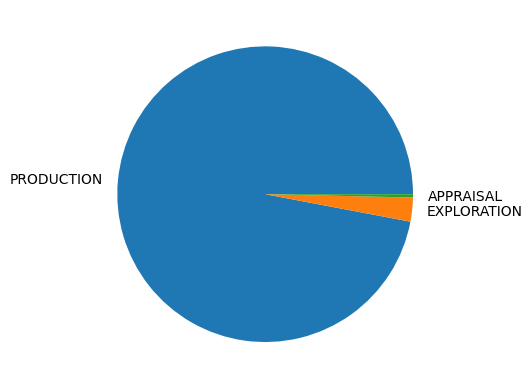

In [9]:
plt.pie(values, labels=labels)

## VM wells

In [10]:
vm_wells = myapi.getWells(fieldmaster_fk=26)

In [11]:
vm_wells.df

,id,well_name,spud_date,production_date,api_code,latitude,longitude,utm_x,utm_y,comment,type,field_fk,formation_fk,field_name,formation_name
0,859,YPF.Nq.AnN.x-1,None,None,None,-38.31609424,-68.73246749,None,None,,EXPLORATION,26,27,LOMA CAMPANA,SBLA
1,860,YPF.Nq.An.x-1,None,None,None,-38.35628284,-68.74072869,None,None,,EXPLORATION,26,28,LOMA CAMPANA,QTUC
2,861,YPF.Nq.BAn.x-1,None,None,None,-38.34733164,-68.78721623,None,None,,EXPLORATION,26,27,LOMA CAMPANA,SBLA
3,862,YPF.Nq.LCm.a-3,None,None,None,-38.36005552,-68.63345312,None,None,,PRODUCTION,26,28,LOMA CAMPANA,QTUC
4,863,YPF.Nq.LCm.e-2,None,None,None,-38.34727483,-68.60262977,None,None,,EXPLORATION,26,27,LOMA CAMPANA,SBLA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1694,YPF.Nq.SOil.x-1,None,None,None,-38.3572280003,-68.6314285963,None,None,,EXPLORATION,26,29,LOMA CAMPANA,VMUT
836,1695,YPF.Nq.SOil.x-2h,None,None,None,-38.3516,-68.6232,None,None,,PRODUCTION,26,29,LOMA CAMPANA,VMUT
837,1696,YPF.Nq.VN.a-2,None,None,None,-38.31405975,-68.91156937,None,None,,PRODUCTION,26,28,LOMA CAMPANA,QTUC
838,1697,YPF.Nq.VN.x-1,None,None,None,-38.31594051,-68.90884566,None,None,,EXPLORATION,26,28,LOMA CAMPANA,QTUC


In [12]:
vm_wells_prod = myapi.getWells(fieldmaster_fk=26, should_show_gt_zero=True)
vm_wells_prod.df

,id,well_name,spud_date,production_date,api_code,latitude,longitude,utm_x,utm_y,comment,type,field_fk,formation_fk,field_name,formation_name
0,867,YPF.Nq.LCue.x-1,None,None,None,-38.3264,-68.799,None,None,,EXPLORATION,26,29,LOMA CAMPANA,VMUT
1,869,YPF.Nq.LGus.x-1,None,None,None,-38.3339,-68.9156,None,None,,EXPLORATION,26,29,LOMA CAMPANA,VMUT
2,870,YPF.Nq.LGus.x-2,None,None,None,-38.3217588575,-68.9026633573,None,None,,EXPLORATION,26,28,LOMA CAMPANA,QTUC
3,871,YPF.Nq.LLL-1020(d),None,None,None,-38.29465043,-68.92674155,None,None,,PRODUCTION,26,29,LOMA CAMPANA,VMUT
4,872,YPF.Nq.LLL-1021(d),None,None,None,-38.29465049,-68.92639816,None,None,,PRODUCTION,26,29,LOMA CAMPANA,VMUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1690,YPF.Nq.SOil-78,None,None,None,-38.33338743,-68.63413157,None,None,,PRODUCTION,26,29,LOMA CAMPANA,VMUT
697,1691,YPF.Nq.SOil-7(d),None,None,None,-38.33945284,-68.58380227,None,None,,PRODUCTION,26,29,LOMA CAMPANA,VMUT
698,1692,YPF.Nq.SOil-9(d),None,None,None,-38.34026205,-68.5837894,None,None,,PRODUCTION,26,29,LOMA CAMPANA,VMUT
699,1694,YPF.Nq.SOil.x-1,None,None,None,-38.3572280003,-68.6314285963,None,None,,EXPLORATION,26,29,LOMA CAMPANA,VMUT


In [13]:
vm_wells_prod.map(plot_type="other")

## Pie chart from alanapy

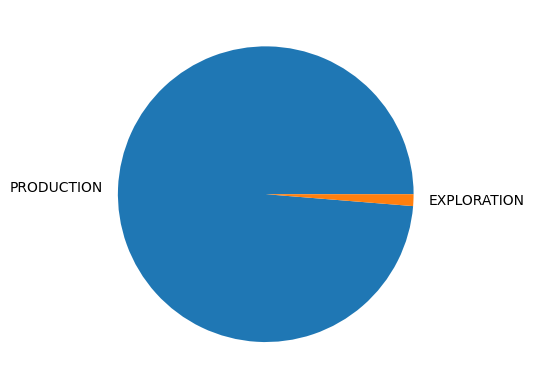

In [14]:
vm_wells_prod.pie()

In [15]:
myapi.getWells(fieldmaster_fk=26).map()

## Getting Production Data

In [16]:
prod_9_f_15 = myapi.getMonthlyProduction("9-F-15_D")

In [17]:
myapi.master.wellmasterdict

{'9-F-5': 7,
 '9-F-4': 6,
 '9-F-15_D': 5,
 '9-F-14': 4,
 '9-F-12': 3,
 '9-F-11': 2,
 '9-F-1_C': 1,
 'YPF.Nq.V.x-1': 1698,
 'YPF.Nq.VN.x-1': 1697,
 'YPF.Nq.VN.a-2': 1696,
 'YPF.Nq.SOil.x-2h': 1695,
 'YPF.Nq.SOil.x-1': 1694,
 'YPF.Nq.SOil.s-447': 1693,
 'YPF.Nq.SOil-9(d)': 1692,
 'YPF.Nq.SOil-7(d)': 1691,
 'YPF.Nq.SOil-78': 1690,
 'YPF.Nq.SOil-77(d)': 1689,
 'YPF.Nq.SOil-76(d)': 1688,
 'YPF.Nq.SOil-75(d)': 1687,
 'YPF.Nq.SOil-74(d)': 1686,
 'YPF.Nq.SOil-73(d)': 1685,
 'YPF.Nq.SOil-72(h)': 1684,
 'YPF.Nq.SOil-71(h)': 1683,
 'YPF.Nq.SOil-70(d)': 1682,
 'YPF.Nq.SOil-69(d)': 1681,
 'YPF.Nq.SOil-68': 1680,
 'YPF.Nq.SOil-67(d)': 1679,
 'YPF.Nq.SOil-66': 1678,
 'YPF.Nq.SOil-65(d)': 1677,
 'YPF.Nq.SOil-64(d)': 1676,
 'YPF.Nq.SOil-63(d)': 1675,
 'YPF.Nq.SOil-62(d)': 1674,
 'YPF.Nq.SOil-61(d)': 1673,
 'YPF.Nq.SOil-60': 1672,
 'YPF.Nq.SOil-6': 1671,
 'YPF.Nq.SOil-59(d)': 1670,
 'YPF.Nq.SOil-58': 1669,
 'YPF.Nq.SOil-57(d)': 1668,
 'YPF.Nq.SOil-56(d)': 1667,
 'YPF.Nq.SOil-55(d)': 1666,
 'YPF.Nq.SOil-

In [18]:
prod_9_f_15.df

,id,date,oil_rate,wat_rate,gas_rate,wat_inj_rate,gas_inj_rate,steam_inj_rate,oil_cum,gas_cum,wat_cum,wat_inj_cum,gas_inj_cum,steam_inj_cum,gor,wcut,wor,well_name
0,1322,2014-01-01,1151.400732,0.000000,9.352425e+05,None,None,None,35693.4227,2.899252e+07,0.0000,0.0,None,None,None,None,None,9-F-15_D
1,1323,2014-02-01,1774.364071,0.000000,1.508687e+06,None,None,None,85375.6167,7.123575e+07,0.0000,0.0,None,None,None,None,None,9-F-15_D
2,1324,2014-03-01,1436.853106,0.000000,1.226187e+06,None,None,None,129918.0630,1.092475e+08,0.0000,0.0,None,None,None,None,None,9-F-15_D
3,1325,2014-04-01,1501.905233,0.000000,1.264595e+06,None,None,None,174975.2200,1.471854e+08,0.0000,0.0,None,None,None,None,None,9-F-15_D
4,1326,2014-05-01,1464.679255,0.000000,1.155142e+06,None,None,None,220380.2769,1.829948e+08,0.0000,0.0,None,None,None,None,None,9-F-15_D
5,1327,2014-06-01,1470.297983,0.000000,1.215100e+06,None,None,None,264489.2164,2.194478e+08,0.0000,0.0,None,None,None,None,None,9-F-15_D
6,1328,2014-07-01,1389.363606,0.000000,1.163122e+06,None,None,None,307559.4882,2.555046e+08,0.0000,0.0,None,None,None,None,None,9-F-15_D
7,1329,2014-08-01,705.167842,0.000000,5.999119e+05,None,None,None,329419.6913,2.741019e+08,0.0000,0.0,None,None,None,None,None,9-F-15_D
8,1330,2014-09-01,1114.283983,0.000000,9.808725e+05,None,None,None,362848.2108,3.035280e+08,0.0000,0.0,None,None,None,None,None,9-F-15_D
9,1331,2014-10-01,1163.238106,37.086652,1.010327e+06,None,None,None,398908.5921,3.348482e+08,1149.6862,0.0,None,None,None,None,None,9-F-15_D


In [19]:
prod_9_f_15.list[0]

{'id': 1322,
 'date': '2014-01-01',
 'oil_rate': 1151.40073225806,
 'wat_rate': 0.0,
 'gas_rate': 935242.542658064,
 'wat_inj_rate': None,
 'gas_inj_rate': None,
 'steam_inj_rate': None,
 'oil_cum': 35693.4227,
 'gas_cum': 28992518.8224,
 'wat_cum': 0.0,
 'wat_inj_cum': 0.0,
 'gas_inj_cum': None,
 'steam_inj_cum': None,
 'gor': None,
 'wcut': None,
 'wor': None,
 'well_name': '9-F-15_D'}

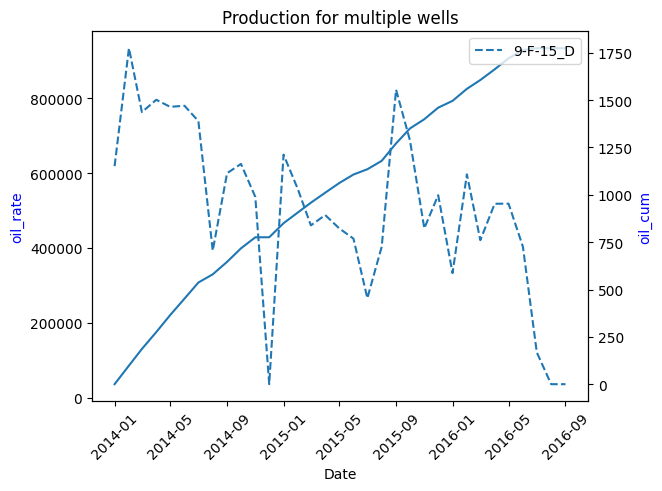

In [20]:
prod_9_f_15.plot()

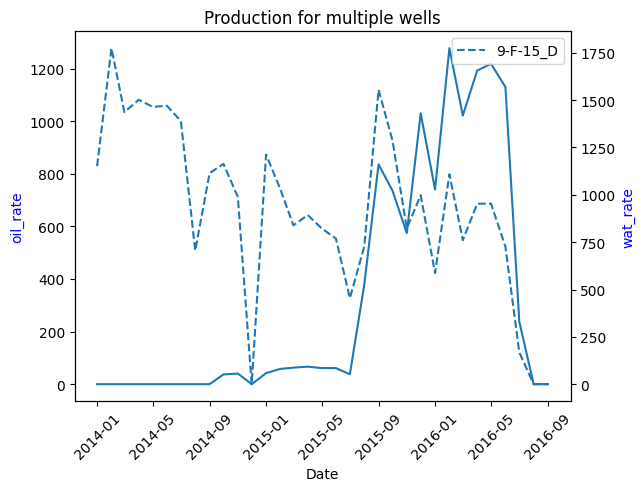

In [21]:
prod_9_f_15.plot("oil_rate", "wat_rate")

## Get production for multiple wells

In [22]:
selected_wells = ['9-F-12', '9-F-14', '9-F-11']
params = {
    "wells_names[]": selected_wells
}

multi_well_prod = myapi.getMonthlyProduction(**params)

In [23]:
multi_well_prod.df['well_name'].unique()

array(['9-F-14', '9-F-12', '9-F-11'], dtype=object)

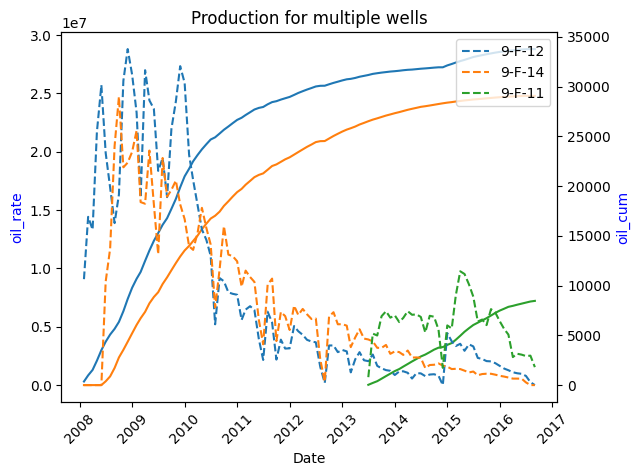

In [24]:
multi_well_prod.plot()

## Get aggregated production for multiple wells

In [25]:
selected_wells = ['9-F-12', '9-F-14', '9-F-11']
params = {
    "wells_names[]": selected_wells,
    "should_aggregate": True
}

multi_well_prod_agg = myapi.getMonthlyProduction(**params)

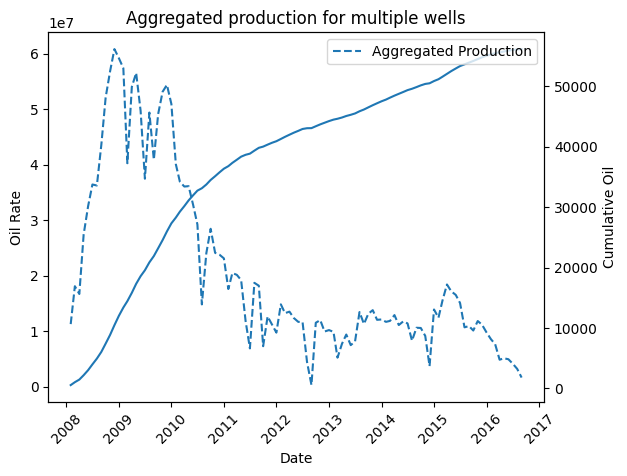

In [26]:
multi_well_prod_agg.plot()

In [27]:
multi_well_prod_agg.plot(plot_type="bokeh")

Loading BokehJS ...

In [28]:
import yaml
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

plot_config = config['plot_config']

FileNotFoundError: [Errno 2] No such file or directory: 'config.yaml'

In [ ]:
selected_wells = ['9-F-12', '9-F-14', '9-F-11']
params = {
    "wells_names[]": selected_wells
}

multi_well_prod = myapi.getMonthlyProduction(**params)

In [ ]:
def my_own_plot(df, var="wat_rate", var2="wat_cum", plot_type="matplotlib"):
    # labels_dict = {
    #     "sum_oil_rate": "Sum Oil Rate",
    #     "sum_oil_cum": "Sum Cumulative Oil"
    # }
    var_settings = plot_config.get(var, {})
    var2_settings = plot_config.get(var2, {})

    label = var_settings.get('label', var)
    color = var_settings.get('color', 'blue')
    line_thickness = var_settings.get('line_thickness', 1)
    line_type = var_settings.get('line_type', 'solid')

    label2 = var2_settings.get('label', var2)
    color2 = var2_settings.get('color', 'blue')
    line_thickness2 = var2_settings.get('line_thickness', 1)
    line_type2 = var2_settings.get('line_type', 'solid')

    my_wells = list(set(df['well_name']))

    if plot_type == "matplotlib":
        fig, ax1 = plt.subplots()
        plt.title("Production for multiple wells")
        # Create primary axis for rate
        ax1.set_xlabel('Date')
        ax1.tick_params(axis='x', rotation=45)
        ax1.set_ylabel(label, color=color)

        # Create secondary axis for cumulative
        ax2 = ax1.twinx()
        ax2.set_ylabel(label2, color=color2)
        my_wells = list(set(df['well_name']))
        for well in my_wells:
            mydf = df[df["well_name"] == well]
            new_date = pd.to_datetime(mydf['date'])
            ax1.plot(new_date, mydf[var2])
            ax2.plot(new_date, mydf[var], linestyle="--")
        plt.legend(my_wells)
        plt.plot()
    elif plot_type == "bokeh":
        # Configure Bokeh plot
        p = figure(title="Production for multiple wells", x_axis_label='Date', x_axis_type="datetime",
                   y_axis_label=label)

        p.extra_y_ranges = {"secondary": None}
        p.add_layout(LinearAxis(y_range_name="secondary", axis_label=label2), 'right')

        legend_items = []

        for well in my_wells:
            mydf = df[df["well_name"] == well]
            new_date = pd.to_datetime(mydf['date'])

            l1 = p.line(new_date, mydf[var], line_width=line_thickness, legend_label=well)
            l2 = p.line(new_date, mydf[var2], line_width=line_thickness, line_dash="dashed", y_range_name="secondary")

            legend_items.append((well, [l1, l2]))

        legend = Legend(items=legend_items)
        p.add_layout(legend, 'right')

        show(p)
    else:
        print("Invalid plot_type specified.")


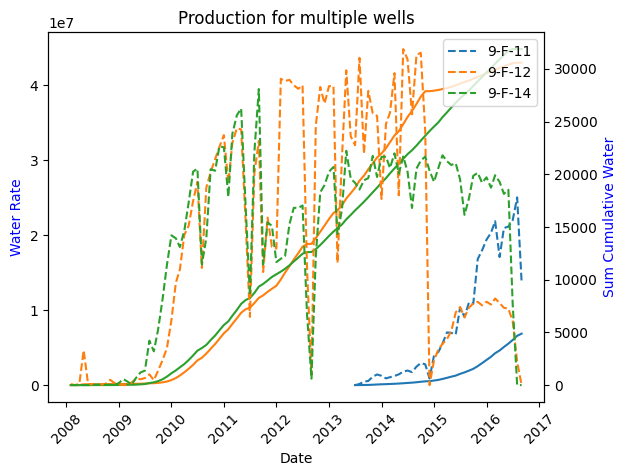

In [ ]:
my_own_plot(multi_well_prod.df)